In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
#import sklearn 
from pandas import Series, DataFrame 
from pylab import rcParams 
#from sklearn import preprocessing 
#from sklearn.linear_model import LogisticRegression  
#from sklearn import metrics 
#from sklearn.metrics import classification_report 


In [2]:
url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv" 


In [3]:
titanic = pd.read_csv(url) 


In [4]:
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ti cket','Fare','Cabin','E mbarked'] 


In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ti cket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:



# traversing through Gender  
# column of dataFrame and  
# writing values where 
# condition matches. 
titanic.Sex[titanic.Sex == 'male'] = 0
titanic.Sex[titanic.Sex == 'female'] = 1
titanic.Sex[titanic.Sex == 'NaN'] = 2

C:\Users\K T KUMAR\Anaconda33\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\K T KUMAR\Anaconda33\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\K T KUMAR\Anaconda33\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [24]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,0


In [25]:
titanic=titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Survived']]

In [26]:
titanic = titanic.reset_index(drop=True)

In [27]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,0


# Define Independent and Dependent features

In [28]:

X=titanic.iloc[:,:-1]
y=titanic.iloc[:,-1]

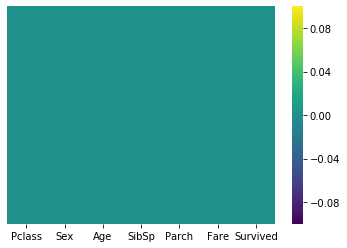

In [29]:
#Checkfor null values using heatmap
sb.heatmap(titanic.isnull(),cmap='viridis',yticklabels=False,cbar=True)

In [30]:
titanic.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

In [31]:
#repalcing missing values of Age with its mean
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())

In [32]:
#repalcing missing values of Age with its mean
titanic['Sex']=titanic['Age'].fillna(titanic['Age'].mean())

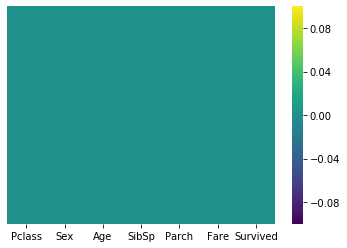

In [33]:
#Checkfor null values again using heatmap
sb.heatmap(titanic.isnull(),cmap='viridis',yticklabels=False,cbar=True)

# Train test split

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# Decision Trees:Build Model

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
treeclassifier=DecisionTreeClassifier()

In [37]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
from sklearn import metrics
y_pred = treeclassifier.predict(X_test)
metrics.f1_score(y_test,y_pred)

0.7391304347826089

In [ ]:
#F1 score for the decision tree classifier is 73% for the test data and we can say that it is a decent model.
#The model can predict whther the passenger has survived or not 73% accurately